# Fintech Customer Analysis Project

This project analyzes a synthetic dataset from the fintech domain. The dataset includes customer profiles, account activity, and loan application details. The main goal is to explore customer behaviors, identify insights about loan approval patterns, and segment users based on financial behavior, without using any predictive modeling.

## Objectives
- Analyze financial behavior by region, income level, and demographics.
- Understand loan approval patterns by user profile.
- Identify high-value or high-risk customer segments.
- Visualize key metrics with Tableau.

## Data Highlights
- Demographic info: age, occupation, education, marital status, region.
- Financial activity: deposits, withdrawals, transfers, balances.
- Loan status: amount, interest rate, purpose, term, approval outcome.
- Time series of transactions and repayments.


In [7]:
# Librerías principales para análisis de datos

import pandas as pd
import numpy as np

# Para visualización básica
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Cargar el archivo CSV

df = pd.read_csv('Fintech_data.csv')

# Ver tamaño del dataset

print("Filas y columnas:", df.shape)

# Ver primeras filas

df.head()


Filas y columnas: (1000, 34)


,Transaction Description,Customer Profile.customer_id,Customer Profile.age,Customer Profile.occupation,Customer Profile.risk_tolerance,Customer Profile.investment_goals,Customer Profile.education_level,Customer Profile.marital_status,Customer Profile.dependents,Customer Profile.region,...,Account Activity.transaction_threshold,Loan Application Summary.loan_amount,Loan Application Summary.loan_purpose,Loan Application Summary.employment_status,Loan Application Summary.loan_term,Loan Application Summary.interest_rate,Loan Application Summary.loan_status,Time Series Data.dates,Time Series Data.transactions,Time Series Data.repayments
0,[{'transaction_id': '8c64f9f6-5f3b-47e2-ad8f-e...,2bfad44e-e5a1-4f34-9083-66ea0f5469fe,57,Student,High,Wealth Preservation,Master's,Widowed,2,South America,...,1000,5000.000000,Small Business,Self-Employed,48,0.058700,approved,"[datetime.date(2024, 5, 9), datetime.date(2024...","[195.35949814489345, 1005.6704380519471, 1463....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[{'transaction_id': '95d68832-90ed-413b-9b0b-8...,6a5c2bb6-616c-4677-8c9d-d8610d9616d8,82,Lawyer,Medium,Wealth Preservation,High School,Widowed,2,Africa,...,500,5000.000000,Debt Consolidation,Unemployed,60,0.051700,approved,"[datetime.date(2024, 4, 30), datetime.date(202...","[61.784649482859464, 1946.0130926494994, 809.8...","[0, 0, 0, np.float64(83.33333333333333), 0, 0,..."
2,[{'transaction_id': 'b0de967f-5067-459f-b8f4-3...,0fb622fd-8fb6-4d35-a939-cada096e1149,52,Lawyer,High,Income Generation,High School,Married,1,Australia,...,500,5009.385587,Small Business,Employed,36,0.102209,pending,"[datetime.date(2024, 1, 18), datetime.date(202...","[399.4277687029365, 1834.9539036545038, 3248.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,[{'transaction_id': '87b8e5de-17b3-4219-97b0-1...,ccc87f75-abc5-4385-90c9-c476fc93cd7e,20,Teacher,High,Income Generation,High School,Married,3,Australia,...,1000,50000.000000,Auto Purchase,Employed,48,0.144600,pending,"[datetime.date(2024, 3, 11), datetime.date(202...","[341.4581652015914, 2618.0148545979687, 1775.7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,[{'transaction_id': '8de6767e-ba43-4922-aeb0-6...,c652b79e-dfa2-4f42-887e-d580586c2ec0,45,Manager,High,Speculation,Master's,Divorced,0,North America,...,3000,5000.000000,Debt Consolidation,Employed,48,0.054100,approved,"[datetime.date(2024, 7, 5), datetime.date(2024...","[1339.423895292654, 999.4727565487262, 1229.66...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [20]:
# Vista previa del dataset principal
print("\nPrimeras filas del dataset:\n")
print(df.head())

print("\n Información general del dataset:\n")
print(df.info())

print("\n Filas duplicadas en el dataset:", df.duplicated().sum())



Primeras filas del dataset:

                             Transaction Description  \
0  [{'transaction_id': '8c64f9f6-5f3b-47e2-ad8f-e...   
1  [{'transaction_id': '95d68832-90ed-413b-9b0b-8...   
2  [{'transaction_id': 'b0de967f-5067-459f-b8f4-3...   
3  [{'transaction_id': '87b8e5de-17b3-4219-97b0-1...   
4  [{'transaction_id': '8de6767e-ba43-4922-aeb0-6...   

           Customer Profile.customer_id  Customer Profile.age  \
0  2bfad44e-e5a1-4f34-9083-66ea0f5469fe                    57   
1  6a5c2bb6-616c-4677-8c9d-d8610d9616d8                    82   
2  0fb622fd-8fb6-4d35-a939-cada096e1149                    52   
3  ccc87f75-abc5-4385-90c9-c476fc93cd7e                    20   
4  c652b79e-dfa2-4f42-887e-d580586c2ec0                    45   

  Customer Profile.occupation Customer Profile.risk_tolerance  \
0                     Student                            High   
1                      Lawyer                          Medium   
2                      Lawyer                  

##  Exploratory Data Analysis – Customer Profile

In this section, we analyze the distribution of customer age and annual income using histograms. These insights help us understand the general demographic and financial landscape of the fintech user base.


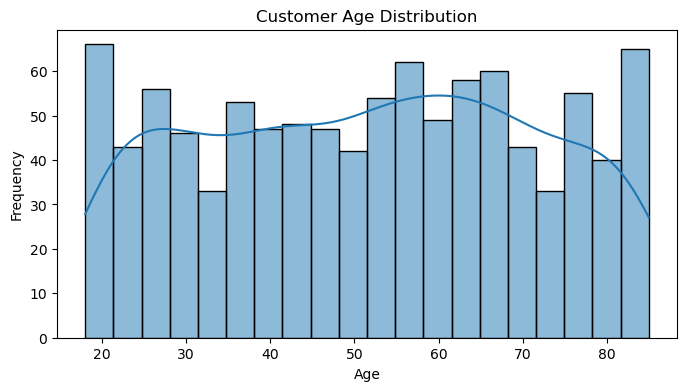

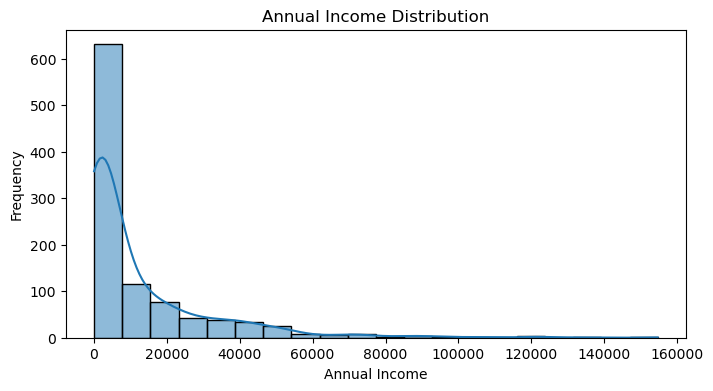

In [47]:
# Histogram: Age distribution

plt.figure(figsize=(8, 4))
sns.histplot(df['Customer Profile.age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram: Annual income distribution

plt.figure(figsize=(8, 4))
sns.histplot(df['Customer Profile.income_level'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


### Insights from Age and Income Distributions

- The age distribution is fairly uniform across different age groups, with slight peaks in the 20, 60, and 80. This indicates that the fintech platform attracts users from a wide range of age groups, suggesting broad market appeal.

- The income distribution is highly right-skewed, with a majority of customers earning less than $10,000 annually. A small proportion of users report significantly higher incomes, but they are rare. This skew suggests the fintech service may primarily serve low- to middle-income individuals, possibly targeting underserved populations.

These insights help define the customer base and can guide marketing or loan product strategies tailored to different age and income segments.


## Customer Profile – Categorical Features

The following charts show the distribution of key categorical variables such as occupation, region, education level, marital status, risk tolerance, and investment goals. These dimensions help define customer segments and behavioral patterns relevant to financial product strategy.


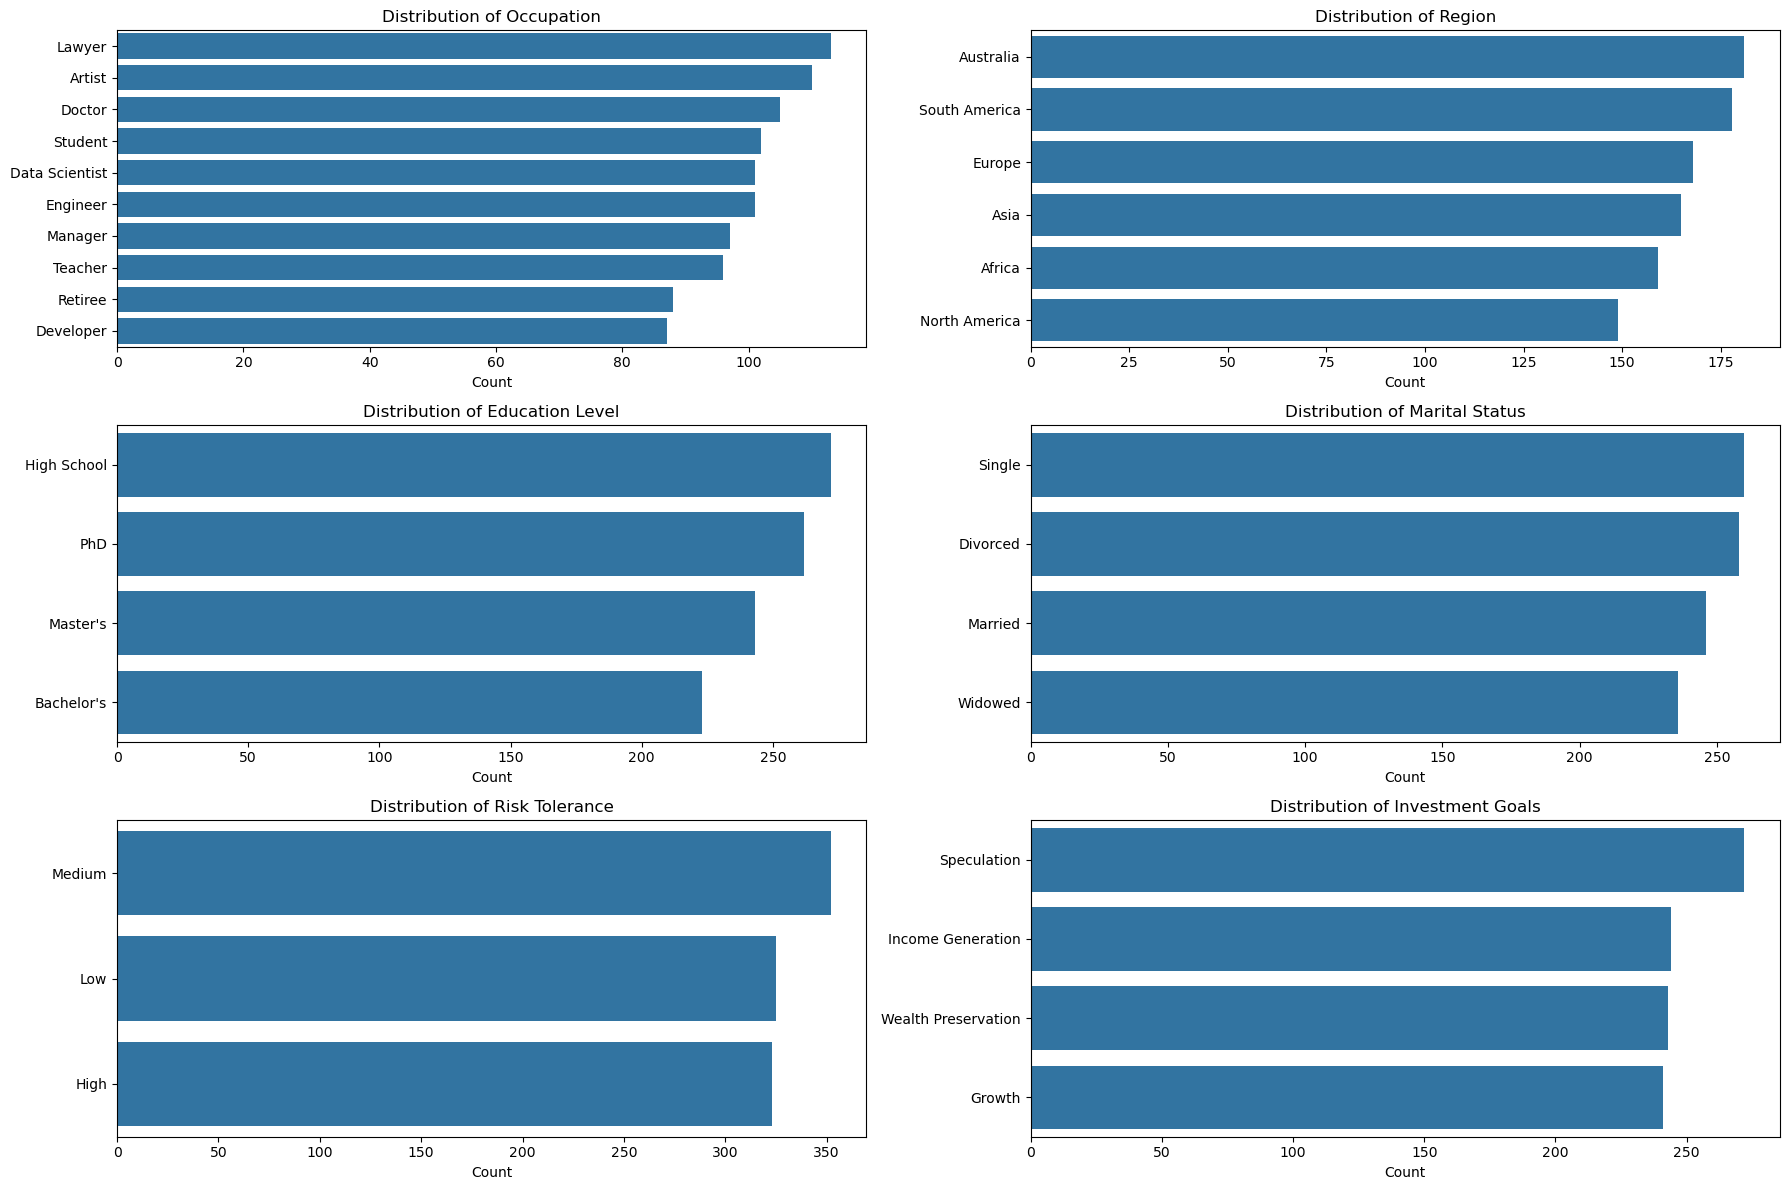

In [43]:
categorical_cols = [
    'Customer Profile.occupation',
    'Customer Profile.region',
    'Customer Profile.education_level',
    'Customer Profile.marital_status',
    'Customer Profile.risk_tolerance',
    'Customer Profile.investment_goals'
]
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col.split(".")[-1].replace("_", " ").title()}')
    plt.xlabel('Count')
    plt.ylabel('')

plt.tight_layout()
plt.show()


###  Insights from Categorical Features

- **Occupation**: The customer base includes a diverse range of professions. Lawyers, artists, and doctors appear most frequently, suggesting the fintech service appeals to a professional and possibly higher-education demographic.

- **Region**: Representation is well-distributed across all global regions, with slightly higher concentrations in Australia and South America. This reflects a strong international footprint.

- **Education Level**: Most users have at least a high school diploma, and a significant portion hold graduate degrees (Master’s and PhD). This suggests users are relatively well-educated and potentially more financially literate.

- **Marital Status**: The distribution is balanced among all categories, with singles and divorced users being the most common, which could influence their financial needs and behavior.

- **Risk Tolerance**: Most users fall into the medium or high-risk tolerance categories, which may reflect an openness to investment products and credit offers.

- **Investment Goals**: Speculation and income generation are the top investment motivations, suggesting a user base that is either growth-oriented or seeking financial independence.

These insights can help shape customer segmentation strategies, targeted campaigns, and the design of financial products that better match customer needs.


##  Loan Application Analysis

This section explores customer loan requests by amount, interest rate, loan status, purpose, and employment status. The goal is to understand loan approval patterns and identify characteristics of clients who are more likely to be approved or rejected.


In [51]:
loan_cols = [
    'Loan Application Summary.loan_amount',
    'Loan Application Summary.interest_rate',
    'Loan Application Summary.loan_term',
    'Loan Application Summary.loan_status',
    'Loan Application Summary.loan_purpose',
    'Loan Application Summary.employment_status'
]

df_loans = df[loan_cols]


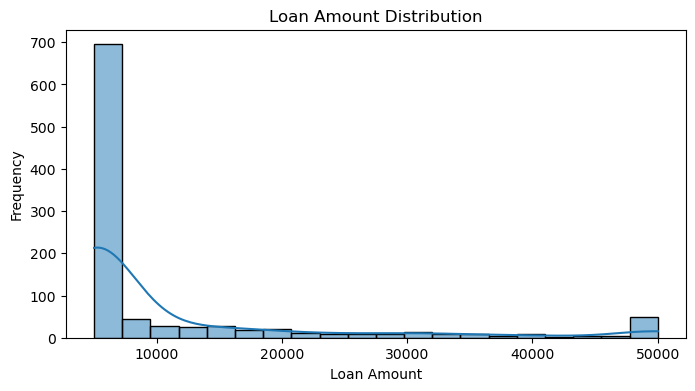

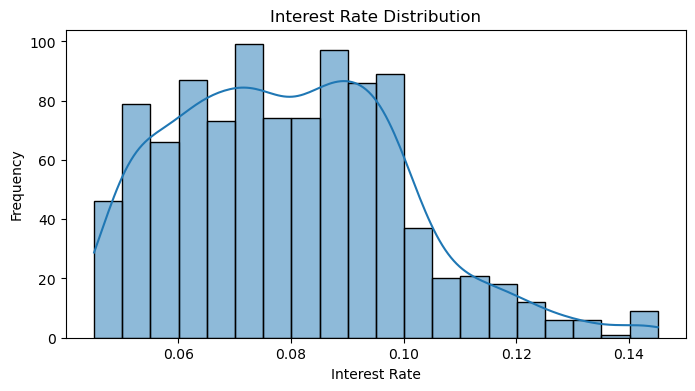

In [53]:
# Loan amount distribution

plt.figure(figsize=(8, 4))
sns.histplot(df_loans['Loan Application Summary.loan_amount'], bins=20, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Interest rate distribution

plt.figure(figsize=(8, 4))
sns.histplot(df_loans['Loan Application Summary.interest_rate'], bins=20, kde=True)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()


###  Insights from Loan Amount and Interest Rate Distributions

- **Loan Amount**: The majority of loan applications are for small amounts, typically under 10,000. This indicates that most customers are seeking small-scale credit—possibly for short-term needs or minor business ventures. There are also a few high-value loans (~$50,000), but these are outliers.

- **Interest Rate**: Interest rates are mostly concentrated between 5% and 10%, with a slightly right-skewed distribution. This suggests that most borrowers are offered moderate rates, while only a small portion face higher risk-based pricing above 12%.

These insights help define the nature of credit demand in this fintech ecosystem, with most users leaning toward short-term, low-to-mid-risk financial products.


##  Loan Status by Employment Status

The following chart shows how loan approval, rejection, and pending status vary across different employment types. This comparison helps understand which employment categories are more likely to get approved.


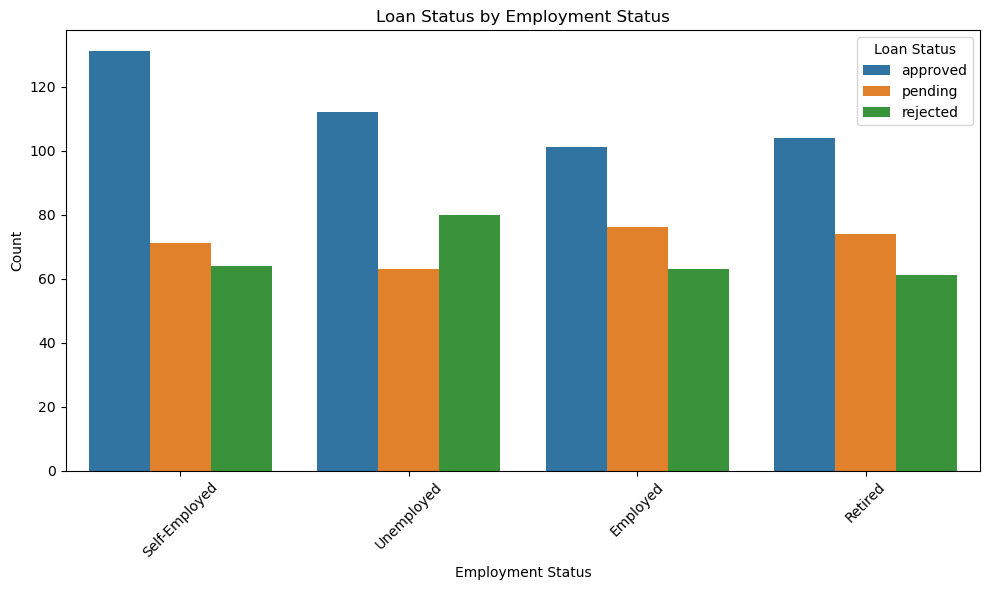

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,
              x='Loan Application Summary.employment_status',
              hue='Loan Application Summary.loan_status')
plt.title('Loan Status by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Insight: Loan Status by Employment Status

- **Self-Employed** individuals have the highest number of approved loans, suggesting that the platform may favor applicants who generate their own income—potentially due to flexible income streams or entrepreneurial activity.

- **Unemployed** applicants show a high rate of **rejected** loans, which is expected due to limited or unstable income sources.

- **Employed** and **Retired** individuals have a more balanced distribution between approvals and rejections, but also show a relatively high number of **pending** applications, possibly indicating stricter evaluation criteria or more documentation required.

This analysis highlights how employment status can influence credit decisions and approval probabilities, which is useful for refining risk models and improving user targeting strategies.


##  Account Activity Analysis

This section explores customer financial behavior in terms of deposits, withdrawals, transfers, and balances. These insights help identify how transactional activity may relate to loan decisions.


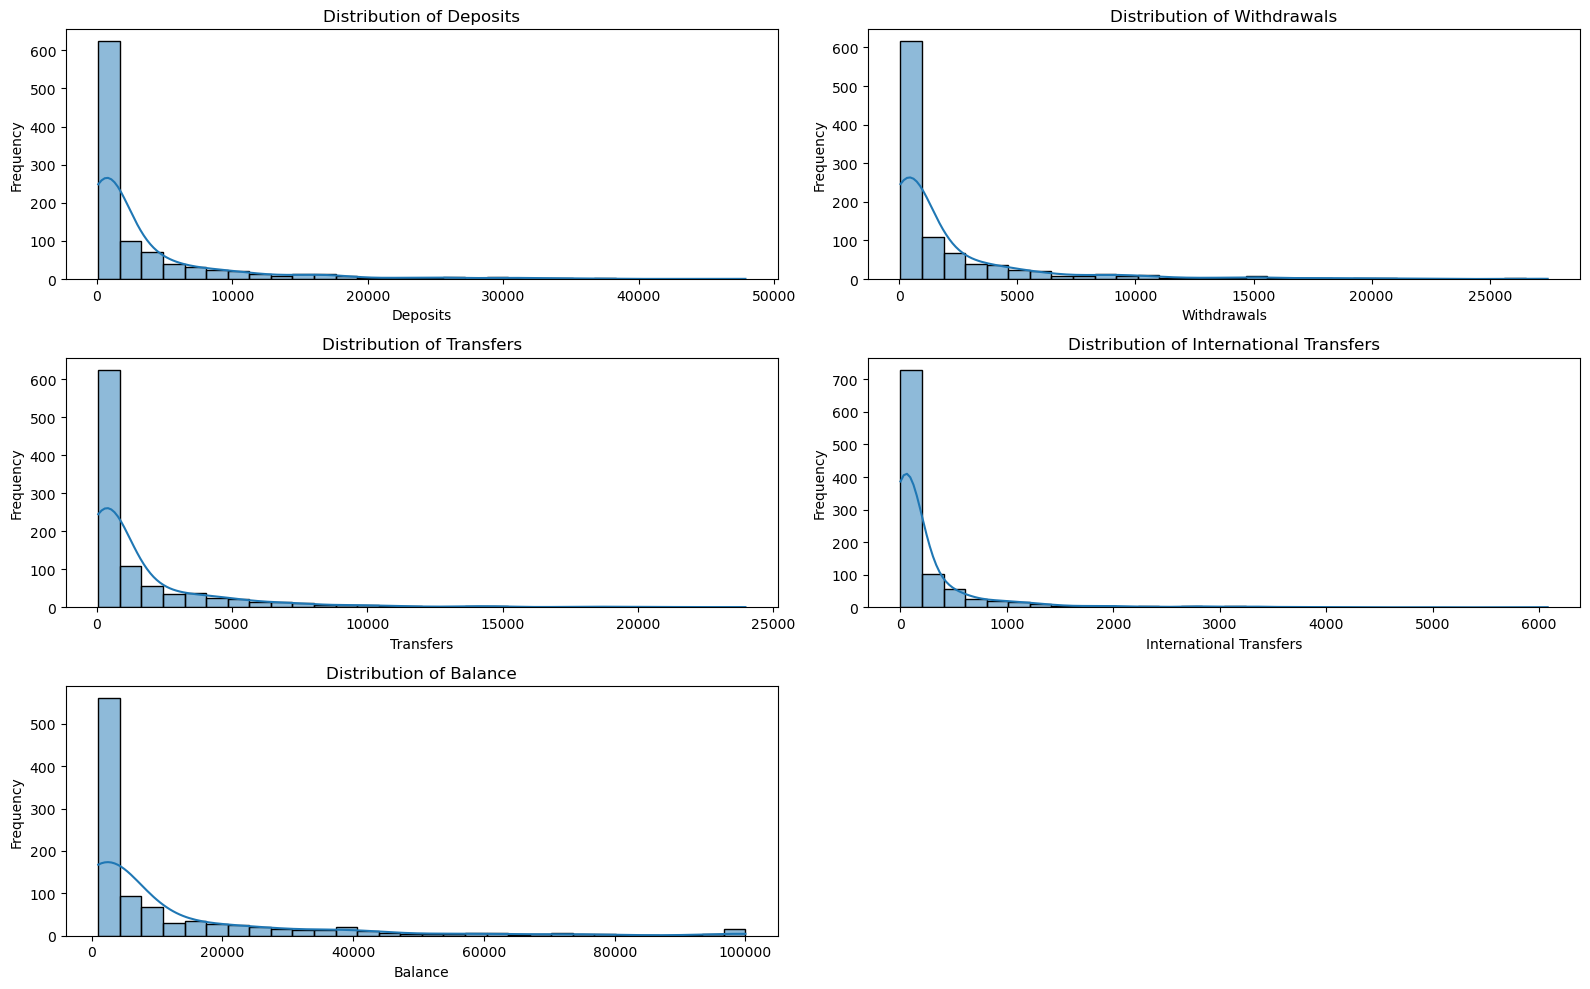

In [67]:
account_cols = [
    'Account Activity.deposits',
    'Account Activity.withdrawals',
    'Account Activity.transfers',
    'Account Activity.international_transfers',
    'Account Activity.balance'
]


plt.figure(figsize=(16, 10))

for i, col in enumerate(account_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col.split(".")[-1].replace("_", " ").title()}')
    plt.xlabel(col.split(".")[-1].replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###  Insights from Account Activity Distributions

- All financial activity variables (deposits, withdrawals, transfers, and balance) are **highly right-skewed**, meaning most users have relatively low financial activity, while a small number of users show very high volumes.

- The majority of customers maintain **low to moderate balances** and transactional activity, suggesting that the platform primarily serves low- to middle-income users with modest financial operations.

- There are clear **outliers** with extremely high balances or transaction volumes, which could represent premium clients or business accounts. These users may warrant further segmentation.

These insights are valuable for tailoring financial products and risk models based on customer behavior and engagement level with their accounts.


##  Loan Status by Account Activity

The following boxplots compare customer financial behavior (deposits, withdrawals, transfers, and balances) across different loan statuses. This analysis helps evaluate whether account activity correlates with the likelihood of loan approval.


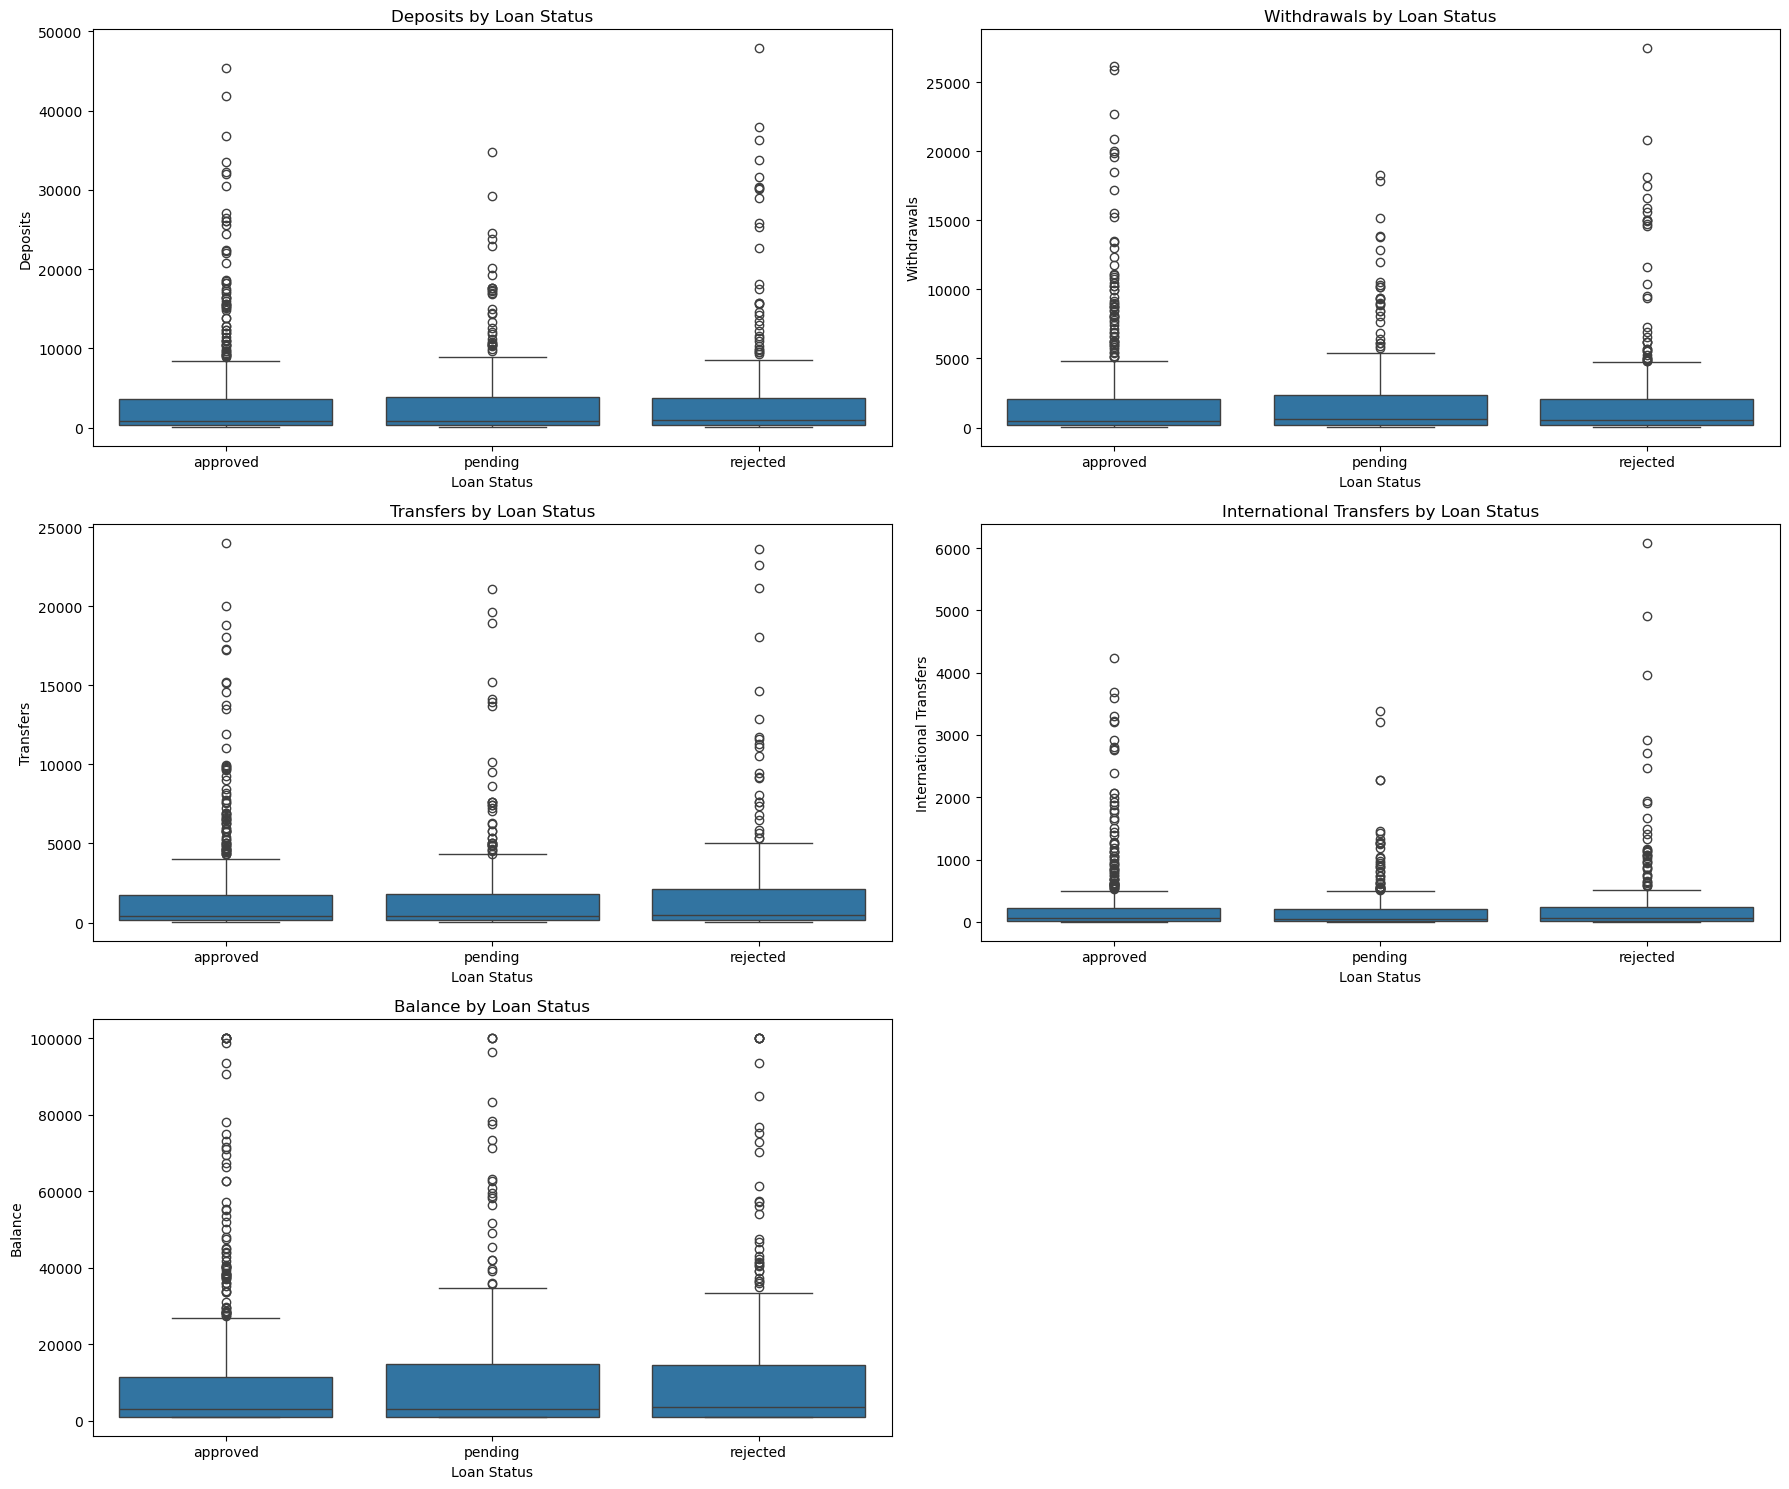

In [74]:
activity_vars = [
    'Account Activity.deposits',
    'Account Activity.withdrawals',
    'Account Activity.transfers',
    'Account Activity.international_transfers',
    'Account Activity.balance'
]


plt.figure(figsize=(18, 15))

for i, col in enumerate(activity_vars):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, x='Loan Application Summary.loan_status', y=col)
    plt.title(f'{col.split(".")[-1].replace("_", " ").title()} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col.split(".")[-1].replace("_", " ").title())

plt.tight_layout()
plt.show()


###  Insights: Financial Activity and Loan Outcomes

- The distribution of financial activity—such as deposits, withdrawals, transfers, and balances—appears **fairly similar across all loan statuses**, with only slight increases in median values for approved loans.

- High outliers are present in every category and loan status, which means that even customers with large financial activity can be **rejected**, likely due to other risk-related factors.

- The boxplots suggest that **account activity alone is not a strong predictor of loan approval**, and should be evaluated in combination with demographic, employment, and behavioral indicators.

These insights support the idea that fintech lenders should use a **multi-dimensional credit assessment approach** rather than relying on financial activity volume in isolation.


## Key Metrics and Quantitative Insights

This section calculates core metrics to quantify relationships between loan decisions and customer characteristics, such as income, account balance, employment status, and deposit activity.


In [82]:
# Loan status distribution 
loan_status_counts = df['Loan Application Summary.loan_status'].value_counts(normalize=True) * 100
print("Loan Approval Rate:")
print(loan_status_counts)

# Average annual income by loan status 
avg_income_by_status = df.groupby('Loan Application Summary.loan_status')['Customer Profile.income_level'].mean()
print("\nAverage Annual Income by Loan Status:")
print(avg_income_by_status)

# Average account balance by loan status 
avg_balance_by_status = df.groupby('Loan Application Summary.loan_status')['Account Activity.balance'].mean()
print("\nAverage Account Balance by Loan Status:")
print(avg_balance_by_status)

# Approval rate by employment status 
employment_loan = df.groupby(['Loan Application Summary.employment_status', 'Loan Application Summary.loan_status'])['Customer Profile.customer_id'].count().unstack().fillna(0)
employment_loan['Approval Rate (%)'] = employment_loan['approved'] / employment_loan.sum(axis=1) * 100
print("\nApproval Rate by Employment Status:")
print(employment_loan[['approved', 'pending', 'rejected', 'Approval Rate (%)']])


low_deposits = df[df['Account Activity.deposits'] < 1000]
low_deposit_status = low_deposits['Loan Application Summary.loan_status'].value_counts(normalize=True) * 100
print("\nLoan Status Distribution for Customers with Deposits Below $1,000:")
print(low_deposit_status)


Loan Approval Rate:
Loan Application Summary.loan_status
approved    44.8
pending     28.4
rejected    26.8
Name: proportion, dtype: float64

Average Annual Income by Loan Status:
Loan Application Summary.loan_status
approved    12487.828007
pending     11768.561436
rejected    12286.242027
Name: Customer Profile.income_level, dtype: float64

Average Account Balance by Loan Status:
Loan Application Summary.loan_status
approved    11852.684697
pending     11866.553227
rejected    12481.620873
Name: Account Activity.balance, dtype: float64

Approval Rate by Employment Status:
Loan Application Summary.loan_status        approved  pending  rejected  \
Loan Application Summary.employment_status                                
Employed                                         101       76        63   
Retired                                          104       74        61   
Self-Employed                                    131       71        64   
Unemployed                                  

###  Summary of Quantitative Insights

- **Loan approval rate** stands at 44.8%, with a significant portion of applications either pending (28.4%) or rejected (26.8%). This reflects a moderately selective lending policy.

- **Average income** among approved applicants is slightly higher than for pending or rejected ones, but not drastically so—indicating that income alone does not fully drive approval decisions.

- **Account balances** follow a similar pattern: the differences between approved, pending, and rejected applicants are minimal, with rejected applicants showing a slightly higher average balance. This suggests that high balances do not guarantee approval and may not be a decisive factor.

- When segmented by **employment status**, self-employed users have the highest approval rate (49.2%), slightly outperforming other groups. This may indicate that the platform values entrepreneurial income more positively than other forms.

- Interestingly, customers with **low deposit activity (under $1,000)** still show a relatively healthy approval rate of 45.3%, reinforcing that approval decisions are likely based on a combination of multiple behavioral and financial variables.

> These findings confirm that loan approvals in this fintech context rely on a **multifactor evaluation**, where no single variable—such as income or account balance—is decisive on its own. A well-rounded customer profile appears to be the key driver of approval outcomes.


## ✅ Project Conclusion

This project provided a comprehensive analysis of customer profiles, financial behavior, and loan decisions using a synthetic fintech dataset. The goal was not to predict loan outcomes, but to extract actionable insights that could help a fintech company improve its lending strategy, customer segmentation, and product design.

Key findings included:

- **Diverse customer base**: Users span a wide range of ages, occupations, and regions, with a high level of education and moderate to high risk tolerance.
- **Loan behavior patterns**: Most loans are requested for essential needs like medical expenses and auto purchases, and the average approval rate is around 45%.
- **No single variable drives approval**: Income, balance, and deposit activity all showed weak correlations with loan status when analyzed in isolation.
- **Employment matters**: Self-employed users had the highest approval rates, suggesting that employment type can influence decisions more than income or balance alone.
- **User segmentation is key**: The combination of behavioral, demographic, and financial data is more effective than any one metric alone.

### 📌 Final insight:
Loan approvals appear to rely on a **multi-factor evaluation** process. Fintech companies should consider combining demographic data with behavioral signals to enhance risk assessment and make smarter, more inclusive lending decisions.

This project demonstrates the value of descriptive analytics in uncovering customer patterns and supporting business strategy without relying on predictive models.
